# Artificial Neural Network (ANN) for Telecom Churn Prediction

## Load Libraries
Importing the required libraries and Installation of any missing packages before running.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Display Formatting
from IPython.display import Markdown
import IPython.display as ipd

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kaggle/churn/cleaned_churn_dataset.csv')
data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Churn,Contract_One year,Contract_Two year,InternetService_Fiber optic
0,0,0,0,1,0,0,25,1,False,False,False
1,1,0,0,41,1,0,25,0,True,False,False
2,0,0,1,52,1,0,19,0,False,False,False
3,0,0,0,1,1,0,76,1,True,False,False
4,1,0,0,67,1,0,51,0,False,False,True


## Spliting the data into training and testing sets

In [ ]:

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Save train and test sets
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv("telecom_churn_train.csv", index=False)
test_df.to_csv("telecom_churn_test.csv", index=False)

print("Training and test files created.")
print(f"Training set: {train_df.shape[0]} rows")
print(f"Test set: {test_df.shape[0]} rows")


Training and test files created.
Training set: 5634 rows
Test set: 1409 rows


## Feature Scaling

In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit only on training data
X_test_scaled = scaler.transform(X_test)        # Transform test data with same params

# Convert back to DataFrames for inspection
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

ipd.display(Markdown("### Scaled Training Data Sample"))
ipd.display(X_train_scaled_df.head())

ipd.display(Markdown("### Scaled Test Data Sample"))
ipd.display(X_test_scaled_df.head())


### Scaled Training Data Sample

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic
0,0.981708,-0.442634,1.535438,-1.276682,0.330235,-0.847471,-0.149881,-0.513334,1.768466,-0.878781
1,-1.018633,-0.442634,-0.651280,-0.096089,0.330235,-0.847471,-0.315125,1.948049,-0.565462,-0.878781
2,-1.018633,2.259205,-0.651280,0.555273,0.330235,1.179982,1.172071,-0.513334,-0.565462,1.137940
3,0.981708,-0.442634,-0.651280,0.433143,0.330235,-0.847471,0.048412,1.948049,-0.565462,-0.878781
4,0.981708,-0.442634,-0.651280,-1.276682,0.330235,1.179982,-1.471834,-0.513334,1.768466,1.137940


### Scaled Test Data Sample

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic
0,-1.018633,2.259205,-0.651280,-1.235972,0.330235,-0.847471,0.643290,1.948049,-0.565462,1.137940
1,0.981708,-0.442634,-0.651280,-0.503190,0.330235,1.179982,-0.017686,-0.513334,-0.565462,1.137940
2,0.981708,-0.442634,1.535438,0.433143,0.330235,-0.847471,-1.504883,1.948049,-0.565462,-0.878781
3,0.981708,-0.442634,1.535438,0.473853,-3.028147,1.179982,-0.348174,-0.513334,-0.565462,1.137940
4,0.981708,-0.442634,-0.651280,-0.543900,0.330235,-0.847471,-1.471834,-0.513334,1.768466,-0.878781


## Building the ANN Model

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),             # Hidden layer 1
    layers.Dropout(0.3),                             # Regularization
    layers.Dense(32, activation='relu'),             # Hidden layer 2
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')            # Output layer (binary classification)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

## Training the ANN Model

In [ ]:

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7254 - loss: 0.5520 - val_accuracy: 0.7786 - val_loss: 0.4682
Epoch 2/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7689 - loss: 0.4722 - val_accuracy: 0.7892 - val_loss: 0.4553
Epoch 3/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7696 - loss: 0.4687 - val_accuracy: 0.7850 - val_loss: 0.4551
Epoch 4/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7635 - loss: 0.4698 - val_accuracy: 0.7892 - val_loss: 0.4547
Epoch 5/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7815 - loss: 0.4559 - val_accuracy: 0.7942 - val_loss: 0.4533
Epoch 6/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7726 - loss: 0.4545 - val_accuracy: 0.7835 - val_loss: 0.4539
Epoch 7/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7742 - loss: 0.4574 - val_accuracy: 0.7857 - val_loss: 0.4510
Epoch 8/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7807 - loss: 0.4458 - val_accuracy: 0.

## Visualizing Training Performance

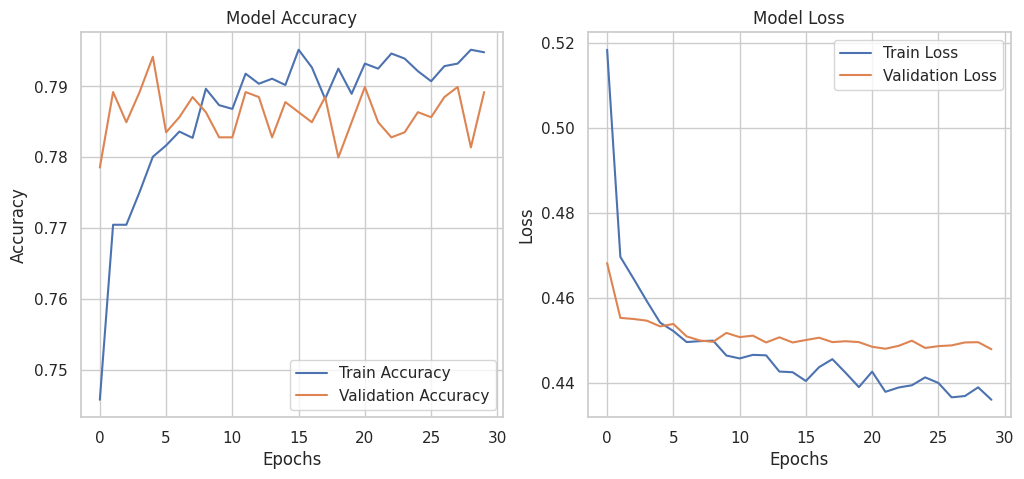

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Model Evaluation on Test Set

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy: 0.7892122072391767

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.65      0.44      0.53       374

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409



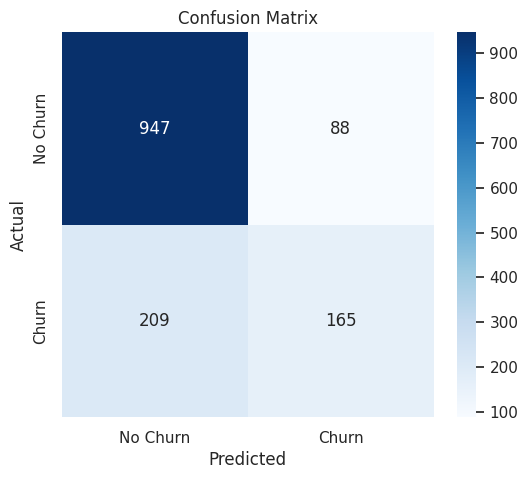

In [ ]:

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## Saving the Model and Scaler

In [ ]:

model.save("telecom_ann_model.h5")

import joblib
joblib.dump(scaler, "scaler.pkl")

print("ANN model and scaler saved successfully.")


ANN model and scaler saved successfully.
